In [ ]:
# 用哪种聚类方法，参数设定

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [24]:
# 基于特征值
pm25 = pd.read_csv("./data-temp/EI_pm25_daily.csv")
pm10 = pd.read_csv("./data-temp/EI_pm10_daily.csv")
so2 = pd.read_csv("./data-temp/EI_so2_daily.csv")
no2 = pd.read_csv("./data-temp/EI_no2_daily.csv")
co = pd.read_csv("./data-temp/EI_co_daily.csv")
o3 = pd.read_csv("./data-temp/EI_o3_daily.csv")

In [27]:
df = pd.merge(pm25, pm10)

In [29]:
df = pd.merge(df, so2)
df = pd.merge(df, no2)
df = pd.merge(df, co)
df = pd.merge(df, o3)

In [31]:
df.columns = ['province', 'date', 'pm25', 'pm10', 'so2', 'no2', 'co', 'o3']

In [33]:
X = df[['pm25', 'pm10', 'so2', 'no2', 'co', 'o3']]

In [34]:
X

,pm25,pm10,so2,no2,co,o3
0,0.869471,1.141625,1.298958,1.148138,1.029111,0.437687
1,0.791364,1.226107,0.956687,0.879651,1.403257,1.132052
2,0.730568,0.852860,1.289182,0.875354,1.647687,1.906702
3,0.841148,0.851362,1.203761,1.059770,1.213926,1.449228
4,0.906887,0.816223,1.187525,1.157466,1.575167,1.225809
...,...,...,...,...,...,...
72298,0.415109,0.506736,0.556642,0.504792,0.922944,1.666138
72299,0.487200,0.473545,0.619801,0.576729,0.960459,1.633408
72300,0.538732,0.525204,0.633784,0.636865,0.968062,1.570229
72301,0.730877,0.652063,0.814461,0.854816,1.012431,1.355729


In [35]:
X = np.array(X)

In [43]:
X

array([[0.86947124, 1.14162459, 1.29895826, 1.14813808, 1.02911094,
        0.43768744],
       [0.79136366, 1.22610654, 0.95668683, 0.87965077, 1.40325734,
        1.13205157],
       [0.73056784, 0.85285962, 1.28918245, 0.87535374, 1.64768692,
        1.90670152],
       ...,
       [0.5387323 , 0.52520406, 0.63378446, 0.63686471, 0.968062  ,
        1.57022893],
       [0.73087749, 0.65206271, 0.81446068, 0.85481587, 1.01243057,
        1.35572918],
       [0.99889484, 0.87509201, 0.8304723 , 0.95797425, 1.04091734,
        1.10080298]])

In [45]:
df_ = pd.read_csv("./data-temp/CN-Reanalysis-daily-2013010100.csv")
df_.head()

,PM2.5(微克每立方米),PM10(微克每立方米),SO2(微克每立方米),NO2(微克每立方米),CO(毫克每立方米),O3(微克每立方米),U(m/s),V(m/s),TEMP(K),RH(%),PSFC(Pa),lat,lon,AQI,Major pollutants,id
0,20.209999,23.559999,8.65,4.58,0.29,63.439999,-2.48,-2.31,291.540009,68.139999,100350.109375,18.34,109.25,28.871428,PM2.5,0
1,20.410000,23.959999,9.28,5.24,0.29,62.529999,-3.43,-3.21,291.959991,67.410004,100546.632812,18.34,109.38,29.157143,PM2.5,1
2,21.170000,24.780001,10.07,5.47,0.30,62.240002,-3.43,-4.72,291.369995,69.589996,100428.132812,18.33,109.52,30.242857,PM2.5,2
3,22.240000,26.040001,10.36,5.28,0.30,63.580002,-2.92,-5.32,290.739990,72.940002,100569.273438,18.33,109.66,31.771429,PM2.5,3
4,19.680000,22.340000,7.62,3.58,0.29,66.209999,-2.51,-3.13,291.670013,65.970001,101620.343750,18.49,108.83,28.114286,PM2.5,4


In [46]:
df_.drop(columns=["U(m/s)","V(m/s)","TEMP(K)","RH(%)","PSFC(Pa)", "lat", "lon", "AQI", "Major pollutants", "id"], inplace=True)

In [48]:
df_.columns = ['pm25', 'pm10', 'so2', 'no2', 'co', 'o3']
X_ = np.array(df_)

In [49]:
X_

array([[20.209999, 23.559999,  8.65    ,  4.58    ,  0.29    , 63.439999],
       [20.41    , 23.959999,  9.28    ,  5.24    ,  0.29    , 62.529999],
       [21.17    , 24.780001, 10.07    ,  5.47    ,  0.3     , 62.240002],
       ...,
       [ 0.14    ,  0.16    ,  1.51    ,  0.56    ,  0.22    , 63.93    ],
       [ 0.15    ,  0.18    ,  1.27    ,  0.6     ,  0.22    , 64.559998],
       [ 0.17    ,  0.2     ,  1.12    ,  0.7     ,  0.22    , 64.879997]])

In [59]:
df_data = pd.read_csv("./data-temp/CN-Reanalysis-daily-2013010100.csv")
Xd = df_data.drop(columns=["lat","lon","AQI","Major pollutants","id"])

In [58]:
Xd = np.array(Xd)
Xd

array([[2.02099990e+01, 2.35599990e+01, 8.65000000e+00, ...,
        2.91540009e+02, 6.81399990e+01, 1.00350109e+05],
       [2.04100000e+01, 2.39599990e+01, 9.28000000e+00, ...,
        2.91959991e+02, 6.74100040e+01, 1.00546633e+05],
       [2.11700000e+01, 2.47800010e+01, 1.00700000e+01, ...,
        2.91369995e+02, 6.95899960e+01, 1.00428133e+05],
       ...,
       [1.40000000e-01, 1.60000000e-01, 1.51000000e+00, ...,
        2.45500000e+02, 5.72200010e+01, 9.66185234e+04],
       [1.50000000e-01, 1.80000000e-01, 1.27000000e+00, ...,
        2.46059998e+02, 5.46300010e+01, 9.71711875e+04],
       [1.70000000e-01, 2.00000000e-01, 1.12000000e+00, ...,
        2.46369995e+02, 5.34399990e+01, 9.76471875e+04]])

In [ ]:
cluster_score = []
method = []

In [ ]:
# Birch聚类
method.append("Birch")
brc = Birch(n_clusters=None)
brc.fit(X)
num = brc.predict(X)
cluster_score.append(metrics.calinski_harabasz_score(X, num))

In [ ]:
# DBSCAN聚类
method.append("DBSCAN")
clustering = DBSCAN(eps=3, min_samples=3).fit(X)
cluster_score.append(metrics.calinski_harabasz_score(X, clustering.labels_))

In [ ]:
# Kmeans聚类
method.append("Kmeans")
kmeans = KMeans(n_clusters=5).fit(X)
cluster_score.append(metrics.calinski_harabasz_score(X, kmeans.labels_))

In [ ]:
cluster_score

In [38]:
# inertia: 每个样本点到其所在质心的距离之和
inertias = []  # 存放每个簇族对应的簇内平方和
k_range = range(2, 10)
for k in k_range:
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X)
    inertias.append(estimator.inertia_)

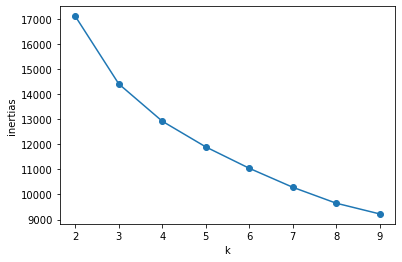

In [39]:
plt.plot(k_range, inertias, 'o-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

In [40]:
from sklearn.metrics import silhouette_score
Scores = []  # 轮廓系数
k_range = range(2, 10)
for k in k_range:
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X)
    Scores.append(silhouette_score(X, estimator.labels_, metric='euclidean'))

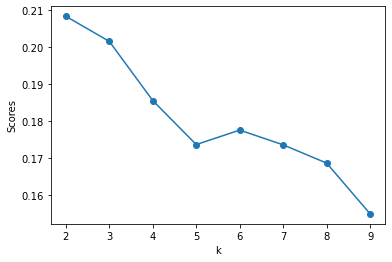

In [41]:
plt.plot(k_range, Scores, 'o-')
plt.xlabel('k')
plt.ylabel('Scores')
plt.show()

In [50]:
inertias = []  # 存放每个簇族对应的簇内平方和
k_range = range(2, 10)
for k in k_range:
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X_)
    inertias.append(estimator.inertia_)

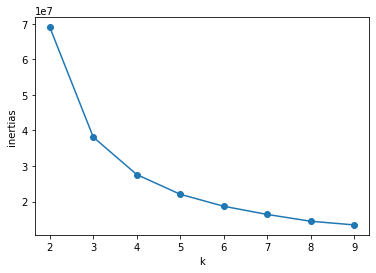

In [51]:
plt.plot(k_range, inertias, 'o-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

In [52]:
Scores = []  # 轮廓系数
k_range = range(2, 10)
for k in k_range:
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X_)
    Scores.append(silhouette_score(X_, estimator.labels_, metric='euclidean'))

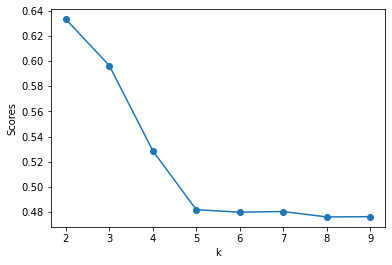

In [53]:
plt.plot(k_range, Scores, 'o-')
plt.xlabel('k')
plt.ylabel('Scores')
plt.show()

In [61]:
inertias = []  # 存放每个簇族对应的簇内平方和
k_range = range(2, 10)
for k in k_range:
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(Xd)
    inertias.append(estimator.inertia_)

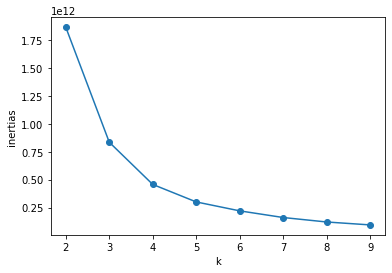

In [62]:
plt.plot(k_range, inertias, 'o-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

In [63]:
Scores = []  # 轮廓系数
k_range = range(2, 10)
for k in k_range:
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(Xd)
    Scores.append(silhouette_score(Xd, estimator.labels_, metric='euclidean'))

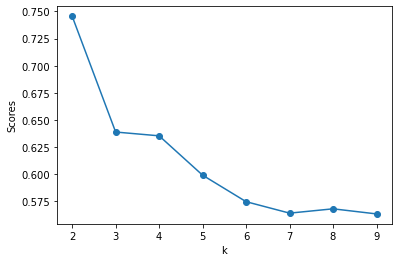

In [64]:
plt.plot(k_range, Scores, 'o-')
plt.xlabel('k')
plt.ylabel('Scores')
plt.show()